# **Penerapan Support Vector Machine Berbasis Chi-Squared untuk Prediksi Tingkat Keparahan Kanker Paru-Paru**

Kelompok 3 :
1. Saripah (2110511060)
2. David Siddi (2110511061)
3. Muhammad Daffa Raihan Nurrizqi (2110511062)

### **1. Exploratory Data Analysis**

Pandas adalah alat yang dapat digunakan untuk mengelola dan menganalisis data. NumPy adalah alat yang dapat digunakan untuk operasi matematika. Matplotlib adalah alat yang dapat digunakan untuk membuat grafik. Seaborn adalah alat yang dapat digunakan untuk visualisasi statistik.

Modul dari scikit-learn, seperti confusion matrix, classification report, dan lainnya, dapat digunakan untuk mengevaluasi model. StandardScaler adalah alat yang dapat digunakan untuk menstandarisasi fitur. Feature Selection adalah alat yang dapat digunakan untuk memilih fitur yang penting. Warnings adalah fitur Python yang dapat digunakan untuk menangani pemberitahuan.


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import chi2, SelectKBest
import warnings 

Dua baris kode di bawah digunakan untuk membaca dataset dari file "cancerset.csv" dan mengonversinya ke dalam struktur data tabular yang disebut DataFrame menggunakan pustaka Pandas di Python. Baris pertama data = pd.read_csv("cancerset.csv") bertugas membaca file CSV dan menyimpannya dalam variabel data, sementara baris kedua df = pd.DataFrame(data) menghasilkan DataFrame dari data yang telah dibaca.

In [25]:
data = pd.read_csv("cancerset.csv")
df = pd.DataFrame(data)

Menampilkan beberapa baris pertama dari dataset (default 5 baris)

In [26]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


df.describe().T adalah pemanggilan fungsi pada DataFrame Pandas yang menghasilkan statistik deskriptif, seperti rata-rata, standar deviasi, kuartil, nilai minimum, dan maksimum, untuk setiap kolom numerik dalam dataset. Tambahan .T digunakan untuk mentransposisi hasil statistik, mengubah baris menjadi kolom dan sebaliknya.

In [27]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
index,1000.0,499.500,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,37.174,12.005493,14.0,27.75,36.0,45.00,73.0
Gender,1000.0,1.402,0.490547,1.0,1.00,1.0,2.00,2.0
Air Pollution,1000.0,3.840,2.030400,1.0,2.00,3.0,6.00,8.0
Alcohol use,1000.0,4.563,2.620477,1.0,2.00,5.0,7.00,8.0
Dust Allergy,1000.0,5.165,1.980833,1.0,4.00,6.0,7.00,8.0
OccuPational Hazards,1000.0,4.840,2.107805,1.0,3.00,5.0,7.00,8.0
Genetic Risk,1000.0,4.580,2.126999,1.0,2.00,5.0,7.00,7.0
chronic Lung Disease,1000.0,4.380,1.848518,1.0,3.00,4.0,6.00,7.0
Balanced Diet,1000.0,4.491,2.135528,1.0,2.00,4.0,7.00,7.0


df.isna().sum() adalah ekspresi Pandas yang digunakan untuk menghitung jumlah nilai yang hilang (NaN atau null) dalam setiap kolom DataFrame. Dengan isna(), kita mendapatkan DataFrame boolean di mana nilai True menunjukkan lokasi nilai yang hilang. Hasilnya menunjukkan bahwa tidak ada nilai yang hilang (NaN atau null) dalam setiap kolom DataFrame

In [28]:
df.isna().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

### **2. Preprocessing Data**

Kode ini digunakan untuk membuat variabel target baru, disebut y, dalam dataset yang disebut df. Langkahnya adalah mengubah nilai-nilai pada kolom "Level" menjadi angka. Misalnya, jika kolom "Level" awalnya berisi kata "Low", sekarang nilainya akan menjadi 0; jika "Medium", nilainya menjadi 1; dan jika "High", nilainya menjadi 2. Hasil dari perubahan ini disimpan dalam variabel y

In [29]:
y = df.Level = df["Level"].map({'Low': 0, 'Medium': 1, 'High':2})

Kode ini digunakan untuk membuat DataFrame baru yang disebut dataframe dengan menghapus kolom-kolom tertentu dari DataFrame df. Kolom yang dihapus adalah 'index', 'Patient Id', dan 'Level'. 

In [30]:
dataframe = df.drop(['index','Patient Id','Level'], axis=1)


Memasukkan dataframe ke dalam variabel X

In [31]:
X = dataframe
X

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,33,1,2,4,5,4,3,2,2,4,...,4,3,4,2,2,3,1,2,3,4
1,17,1,3,1,5,3,4,2,2,2,...,3,1,3,7,8,6,2,1,7,2
2,35,1,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
3,37,1,7,7,7,7,6,7,7,7,...,8,4,2,3,1,4,5,6,7,5
4,46,1,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,7,5,3,2,7,8,2,4,5,3
996,37,2,6,8,7,7,7,6,7,7,...,7,9,6,5,7,2,4,3,1,4
997,25,2,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
998,18,2,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3


Mencetak y (Level)

In [32]:
y

0      0
1      1
2      2
3      2
4      2
      ..
995    2
996    2
997    2
998    2
999    2
Name: Level, Length: 1000, dtype: int64

Kode ini digunakan untuk menghitung jumlah kemunculan setiap nilai dalam variabel target y (level_counts) dan kemudian membuat diagram batang untuk memvisualisasikan distribusinya. Pada diagram batang, sumbu x menunjukkan nilai-nilai level ('Low', 'Medium', 'High'), sedangkan sumbu y menunjukkan jumlah kemunculan setiap level. 

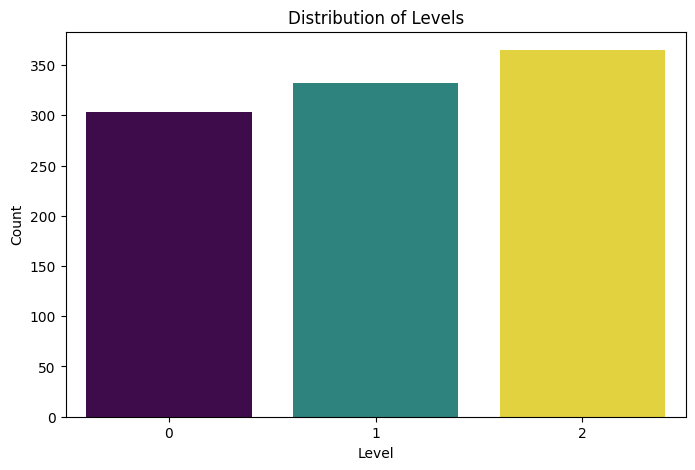

In [33]:
level_counts = y.value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=level_counts.index, y=level_counts.values, hue=level_counts.index, palette="viridis", legend=False)
plt.title('Distribution of Levels')
plt.xlabel('Level')
plt.ylabel('Count')
plt.show()

df.info() memberikan informasi tentang struktur dan tipe data dalam DataFrame. DataFrame memiliki 1000 baris dan 26 kolom. Setiap kolom memiliki 1000 entri non-null, menunjukkan bahwa tidak ada nilai null dalam dataset. 

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

Melihat visualisasi data untuk Gender

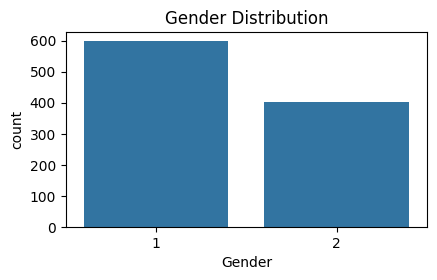

In [35]:
plt.figure(figsize=(12, 5))

plt.subplot(2, 3, 1)
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')

plt.tight_layout()
plt.show()

Melihat visualisasi untuk pendistribusian AGE

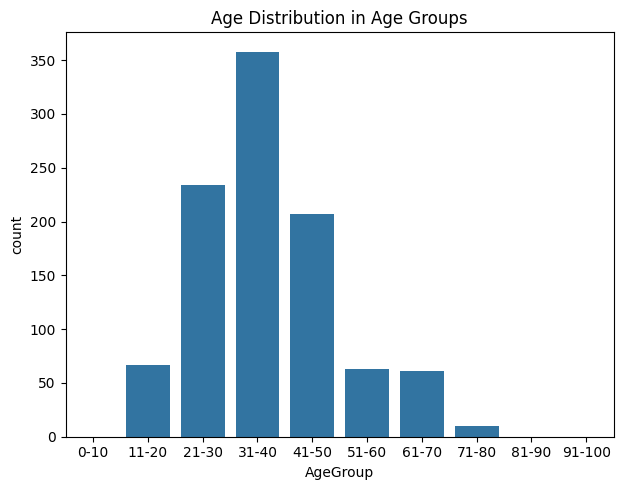

In [36]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='AgeGroup', data=df, order=labels)
plt.title('Age Distribution in Age Groups')
plt.tight_layout()
plt.show()

In [37]:
X.count()

Age                         1000
Gender                      1000
Air Pollution               1000
Alcohol use                 1000
Dust Allergy                1000
OccuPational Hazards        1000
Genetic Risk                1000
chronic Lung Disease        1000
Balanced Diet               1000
Obesity                     1000
Smoking                     1000
Passive Smoker              1000
Chest Pain                  1000
Coughing of Blood           1000
Fatigue                     1000
Weight Loss                 1000
Shortness of Breath         1000
Wheezing                    1000
Swallowing Difficulty       1000
Clubbing of Finger Nails    1000
Frequent Cold               1000
Dry Cough                   1000
Snoring                     1000
dtype: int64

### **3. Selection Data using Chi-Squared Feature Selection**

Bagian kode ini akan melakukan proses seleksi fitur menggunakan metode Chi-Squared. Kode pertama-tama mengimpor dua modul dari scikit-learn: SelectKBest dan chi2. SelectKBest adalah kelas yang digunakan untuk memilih fitur berdasarkan relevansinya dengan variabel target. chi2 adalah fungsi uji chi-squared.Selanjutnya, kode membuat instance SelectKBest dan menetapkan k parameter ke 20. Ini berarti bahwa 20 fitur dengan nilai chi-squared tertinggi akan dipilih. 

Kemudian, kode melakukan transformasi data dengan menggunakan fit_transform(). Ini akan menghasilkan dataset baru yang hanya berisi 20 fitur yang dipilih. Terakhir, kode mencetak nilai chi-squared dan nama fitur yang dipilih.

In [38]:


chi2_selector = SelectKBest(chi2, k=20)
X_chi2 = chi2_selector.fit_transform(X, y)

selected_features = X.columns[chi2_selector.get_support()]

print("Chi-squared scores for each feature:")
for feature, score in zip(X.columns, chi2_selector.scores_):
    print(f"{feature}: {score}")

print("\nSelected Features:")
print(selected_features)

Chi-squared scores for each feature:
Age: 44.18720190087567
Gender: 4.668164778741005
Air Pollution: 518.6315329755657
Alcohol use: 781.9098413190312
Dust Allergy: 401.0408830692596
OccuPational Hazards: 415.68565442569525
Genetic Risk: 488.6497258953134
chronic Lung Disease: 302.396156686843
Balanced Diet: 588.9337428961087
Obesity: 712.0875622310214
Smoking: 671.0062531127054
Passive Smoker: 752.9597913577139
Chest Pain: 524.4895211052152
Coughing of Blood: 818.6688836857343
Fatigue: 518.9004462647206
Weight Loss: 206.66656281005538
Shortness of Breath: 330.88070876845114
Wheezing: 201.42618929952533
Swallowing Difficulty: 113.07424926209457
Clubbing of Finger Nails: 257.9076792181332
Frequent Cold: 192.71327574447326
Dry Cough: 152.02954698286706
Snoring: 91.74815519852055

Selected Features:
Index(['Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards',
       'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity',
       'Smoking', 'Passive Smoker', 'Ch

Data yang sudah seleksi, kemudian akan displit untuk mendapatkan data training dan data testing. Splitting dilakukan dengan ukuran data testing 20% dan data training 80%.

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_chi2, y, test_size=0.2, random_state=42)

### **4. Modelling**

Bagian ini akan melakukan tuning hyperparameters pada model Support Vector Machine (SVM). Kode pertama-tama mengimpor dua modul dari scikit-learn: SVC dan GridSearchCV. SVC adalah kelas untuk model SVM, sedangkan GridSearchCV adalah kelas untuk melakukan tuning hyperparameters menggunakan grid search. Selanjutnya, kode membuat instance SVC dan menetapkan nilai default untuk hyperparametersnya.Kemudian, kode membuat dictionary param_grid yang berisi daftar nilai hyperparameters yang akan dicoba. Dalam kasus ini, hyperparameters yang dicoba adalah C, kernel, dan gamma.

Kemudian, kode membuat instance GridSearchCV dan menetapkan nilai param_grid dan cv. cv menentukan jumlah fold dalam cross-validation. Kemudian, kode melakukan fitting model SVM dengan tuning hyperparameters menggunakan data training. Terakhir, kode mencetak nilai hyperparameters dan akurasi terbaik yang diperoleh dari grid search.

In [40]:
svm_model = SVC()

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
}

grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

best_svm_model = grid_search.best_estimator_

y_pred = best_svm_model.predict(X_test)

Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Accuracy: 1.0


### **5. Evaluation**

##### a. Classification Report

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        63
           2       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



##### b. K-Fold Cross Validation

In [43]:
model = svm_model

num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

cross_val_results = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

print("Cross-Validation Results:")
print("Individual fold accuracies:", cross_val_results)
print("Average accuracy across folds:", cross_val_results.mean())

Cross-Validation Results:
Individual fold accuracies: [0.96 0.99 0.96 0.93 0.97 0.98 0.99 0.99 1.   0.98]
Average accuracy across folds: 0.975


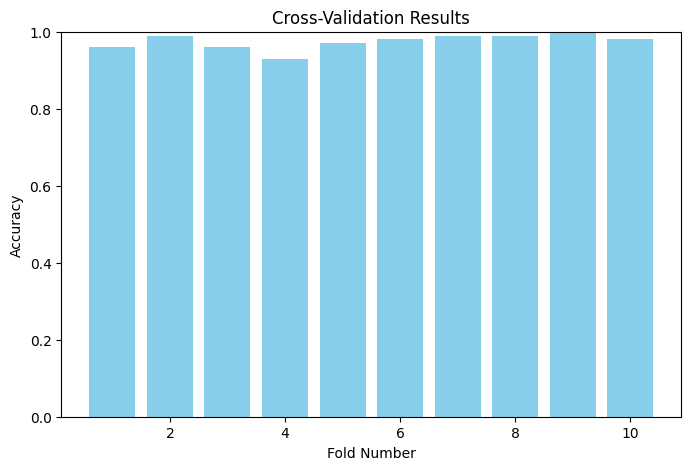

Average accuracy across folds: 0.975


In [44]:
cross_val_results = cross_val_score(svm_model, X, y, cv=kf, scoring='accuracy')

plt.figure(figsize=(8, 5))
plt.bar(range(1, num_folds + 1), cross_val_results, color='skyblue')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Results')
plt.ylim([0, 1])
plt.show()

print("Average accuracy across folds:", cross_val_results.mean())

##### c. Confusion Matrix

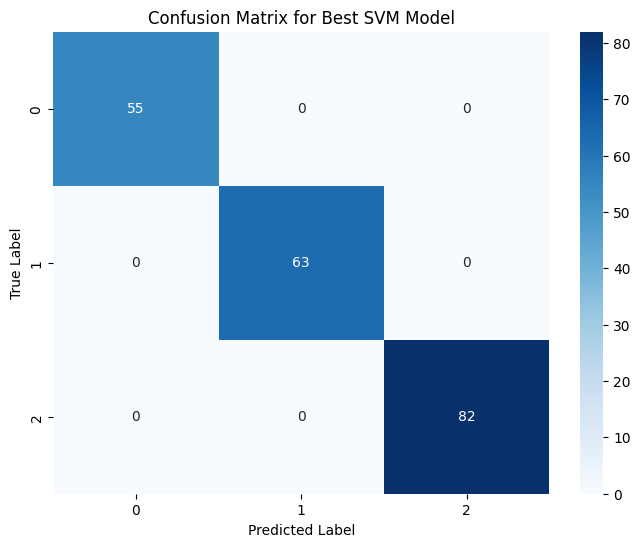

In [45]:
best_svm_model.fit(X_train, y_train)

y_pred = best_svm_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_svm_model.classes_, yticklabels=best_svm_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Best SVM Model')
plt.show()
